In [1]:
from project.models.char_baseline import CharSeqBaseline
from project.models.code2vec_solo import Code2VecSolo
from project.models.code2vec_encoder import Code2VecEncoder
from project.models.base_model import _run_model


/home/ehambro/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load_dir = {"logdir":"logs/BIG_X_new_attention_second_experiment__var_otherargs_2008_102707/best_bleu", "mode":"RETURN"}
load_dir = {"logdir":"logs/new_attention_second_experiment__var_otherargs_1808_200101/best_bleu", "mode":"RETURN"}
LOADED = _run_model(CharSeqBaseline, **load_dir)


LOADING FROM: logs/new_attention_second_experiment__var_otherargs_1808_200101/best_bleu, overwriting kwargs


Loading GloVe weights and word to index lookup table


400000it [00:07, 53778.02it/s]


Creating char to index look up table
Tokenizing the word descriptions and characters
Tokenizing the src code
Extracting tensors train and test
INFO:tensorflow:Restoring parameters from logs/new_attention_second_experiment__var_otherargs_1808_200101/best_bleu/BasicModel.ckpt-17589


0820_23:52 WARNING - Loaded from logs/new_attention_second_experiment__var_otherargs_1808_200101/best_bleu: Global Step 17589


In [3]:
sess, nn, data_tuple, step = LOADED

In [4]:
# RESULTS = nn.evaluate_bleu(sess, data_tuple.test, max_translations=10000)

In [5]:
import random
import numpy as np
from tqdm import tqdm 
from project.external.nmt import bleu


def prep_samples(translations, sample_size, no_samples):
    for n in range(no_samples):
        yield  random.choices(translations, k=sample_size)
        
def get_translations(nn, data):
    return nn.evaluate_bleu(sess, data, max_translations=10000)

def get_bleu_bootstrap(translations, sample_size = 1000, no_samples = 1000):
    bleu_bootstrap = []
    total = []
    for sample in prep_samples(translations, sample_size, no_samples):
        all_references = [[t.description] for t in sample]
        all_translations = [t.translation for t in sample ]
        b = bleu.compute_bleu(all_references, all_translations, max_order=4, smooth=False)
        bleu_bootstrap.append(b[0]*100)
    return bleu_bootstrap
    

In [9]:
import pickle
from collections import namedtuple
from  matplotlib import pyplot as plt 

Examples = namedtuple("Examples", ["translations", "data_tuple"])

def find_examples(translations, data_tuple):
    return_index = []
    return_data = [[] for  _ in data_tuple.test]
    for t in translations:
        for i,d in enumerate(data_tuple.test[-1]):
            arg_name = "".join(nn.translate(data_tuple.test[0][i], lookup=nn.idx2char, do_join=False))
            if d == t.description and arg_name == t.name:
                return_index.append(i)
    
    for j in return_index:
        for k, d in enumerate(return_data):
            d.append(data_tuple.test[k][j])
    
    return [np.stack(x) for x in return_data[:-1]] + [return_data[-1]]

def load_examples(name):
    with open("examples/{}.eg.pkl".format(name), 'rb') as f:
         examples = pickle.load(f)
    return examples

def save_examples(name, good_data_tuple):
    with open("examples/{}.eg.pkl".format(name), 'wb') as f:
        pickle.dump(good_data_tuple, f)


In [7]:
# T200  = get_translations(nn, data_tuple.test[:200])
# find_in_train("binary image", data_tuple, nn)
# selected_data = pickout_data(T200, [47,48], data_tuple)
# for i, t in enumerate(T200[-1]):
#     print(i,t)
#     print(latex_translation(t))

-----
\textbf{I}: \textit{i n p u t $<$SEP-1$>$ s t r u c t u r e $<$SEP-2$>$ m a s k $<$SEP-2$>$ o u t p}...\\
...\textit{u t $<$SEP-2$>$ b o r d e r \_ v a l u e $<$SEP-2$>$ o r i g i n $<$SEP-2$>$ $<$END$>$}\\
\textbf{D}: binary image to be propagated inside ` mask ` .\\
\textbf{P}: binary image where a element is provided and a structuring element . $<$END$>$\\
\\\hline\\

\textbf{I}: \textit{i n p u t $<$SEP-1$>$ n a m e $<$SEP-2$>$ $<$END$>$}\\
\textbf{D}: a ` tensor ` of type ` complex64 ` . a complex64 tensor .\\
\textbf{P}: ` $<$UNK$>$ ` , ` $<$UNK$>$ ` . shape is ` [ ... , m , m ] ` . $<$END$>$\\
\\\hline\\

\textbf{I}: \textit{e n c o d i n g \_ t y p e $<$SEP-1$>$ s e l f $<$SEP-2$>$ d o c u m e}...\\
...\textit{n t $<$SEP-2$>$ r e t r y $<$SEP-2$>$ t i m e o u t $<$SEP-2$>$ $<$END$>$}\\
\textbf{D}: the encoding type used by the api to calculate offsets .\\
\textbf{P}: the encoding type used by the api to calculate sentence offsets . $<$END$>$\\
\\\hline\\



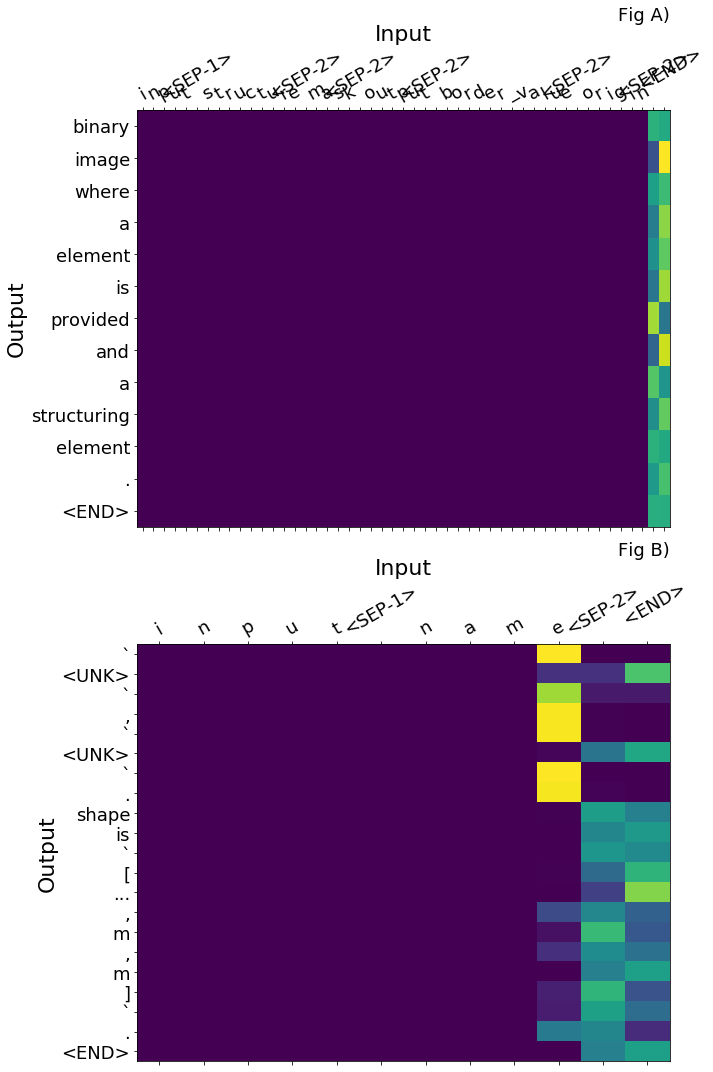

\textbf{I}: \textit{i n p u t $<$SEP-1$>$ s t r u c t u r e 1 $<$SEP-2$>$ s t r u c t u r}...\\
...\textit{e 2 $<$SEP-2$>$ o u t p u t $<$SEP-2$>$ o r i g i n 1 $<$SEP-2$>$ o r i g i n 2 $<$SEP-2$>$ $<$END$>$}\\
\textbf{D}: binary image where a pattern is to be detected .\\
\textbf{P}: \\
\textbf{I}: \textit{i n p u t $<$SEP-1$>$ s t r u c t u r e $<$SEP-2$>$ i t e r a t i o n}...\\
...\textit{s $<$SEP-2$>$ o u t p u t $<$SEP-2$>$ o r i g i n $<$SEP-2$>$ m a s k $<$SEP-2$>$ b o r d e r \_ v a l u e $<$SEP-2$>$ b r u t e \_ f o r c e $<$SEP-2$>$ $<$END$>$}\\
\textbf{D}: binary array\_like to be closed . non-zero ( true ) elements form the subset to be closed .\\
\textbf{P}: \\
\textbf{I}: \textit{i n p u t $<$SEP-1$>$ s t r u c t u r e $<$SEP-2$>$ o u t p u t $<$SEP-2$>$ o r}...\\
...\textit{i g i n $<$SEP-2$>$ $<$END$>$}\\
\textbf{D}: n-dimensional binary array with holes to be filled\\
\textbf{P}: \\
\textbf{I}: \textit{i n p u t $<$SEP-1$>$ s t r u c t u r e $<$SEP-2$>$ o u t p u t $

In [10]:
def plot_attentions(dataset, max_p=None):
    if max_p is None:
        max_p =  len(dataset[-1])
     
    fig, ax = plt.subplots(max_p, figsize=(10,15))
    F="ABCDEFG"
    
    for j, desc in enumerate(dataset[-1]):

        just_one = [ i[j:j+1] for i in dataset ]
        
        trim = len(np.trim_zeros(just_one[0][0])) 
        alignments, translate = nn._feed_fwd(sess, just_one, [nn.inf_state.alignment_history.stack(), nn.inference_id] )
        char_input1 = nn.translate(just_one[0][0], lookup=nn.idx2char, do_join=False)
        
        c_input = " ".join(char_input1)
        
        
        char_input = [c.replace("<SEP-", "   <S-") for c in char_input1]
        char_input = [c.replace("<END", "   <END") for c in char_input1]
        
        word_output = nn.translate(translate[0], do_join=False)
        
        print(latex_translation([char_input1, desc, word_output ]))
        print("\\\\\\hline\\\\")
        print()
        if j == max_p:
            break
        moved = np.squeeze(alignments)
        moved = np.stack([i[:trim] for i in moved])
        moved[:,trim:] = 0.5
        
        
        ax[j].set_title("Fig {})\n\n\n\n".format(F[j]), loc="right", fontsize=18)
        ax[j].matshow(moved, aspect="auto")
#        
        ax[j].set_xticks(np.arange(len(char_input)))
        ax[j].set_xticklabels( char_input, rotation=30,  fontsize=18)
        ax[j].set_yticks(np.arange(len(word_output)))
        ax[j].set_yticklabels(word_output, fontsize=18)
        ax[j].set_ylabel("Output", fontsize=22)
        ax[j].set_xlabel("Input", fontsize=22)
        ax[j].xaxis.set_label_position('top') 
    
    plt.tight_layout()
    plt.show()

def latex_translation(t):
    to_tex = lambda  s:s.replace("<", "$<$").replace(">", "$>$").replace("_","\\_")
    split = 25
    n1 = t[0][:split]
    n1 = "\\textbf{I}: \\textit{" + to_tex(" ".join(n1)) + "}"
    if len(t[0]) > split:
        n1 += "...\\\\\n...\\textit{"+to_tex(" ".join(t[0][split:])) + "}"
    n1 += "\\\\"
    desc = "\\textbf{D}: " + to_tex(" ".join(t[1])) + "\\\\"
    pred = "\\textbf{P}: " + to_tex(" ".join(t[2])) + "\\\\"
    return "\n".join([n1, desc, pred])

    
    
def find_in_train(desc, data_tuple, nn):
    for i,t in enumerate(data_tuple.train[-1]):
#         print(t)
        if desc in " ".join(t):
            chars = nn.translate(data_tuple.train[0][i], lookup=nn.idx2char, do_join=False)
            print(latex_translation([chars, t, [""]]))
            print("\n")
            
def pickout_data(translations, indices, data_tuple):
    trans = [translations[-1][i] for i in indices] 
    return find_examples(trans, data_tuple)

def find_char_starts_with_TRAIN(array):
    input_egs_idx = []
    for i, r in enumerate(data_tuple.train[0]):
        if np.array_equal(r[:len(array)], array):
            input_egs_idx.append(i)
    input_egs = []
    for d in data_tuple.train[:-1]:
    
        input_egs.append(np.stack([d[i] for i in input_egs_idx]))
    input_egs.append([data_tuple.train[-1][i] for i in input_egs_idx])
    for i,r in enumerate(input_egs[0]):
        print(latex_translation([nn.translate(r, lookup=nn.idx2char, do_join=False), input_egs[-1][i], ""]))
    

print("-----")
REPORT_PLOT_DATA = load_examples('SECOND_EXPERIMENT_otherargs___REPORT_binary_input_enc')
plot_attentions(REPORT_PLOT_DATA, 2)



def find_starting__input_SEP_structure():
    return find_char_starts_with_TRAIN(np.array([9, 14, 16, 21, 20, 65, 19, 20, 18, 21,  3, 20 ,21, 18,  5]))

find_starting__input_SEP_structure()

In [ ]:
# bleu_bootstrap = get_bleu_bootstrap(T[-1], sample_size=1000, no_samples=1000)

In [ ]:
# print("{:.5f}, {:.5f}".format(np.mean(bleu_bootstrap), np.std(bleu_bootstrap)))

# print("{:.5f}, {:.5f}".format(np.mean(sorted(bleu_bootstrap)[25:-25]), np.std(sorted(bleu_bootstrap)[25:-25])))

In [ ]:
# [print(i, t) for i, t in enumerate(T[-1])]

### Other Stuff

In [ ]:
egs = load_examples('input_otherargs')
egs2 = load_examples('new_attn_otherargs')

T2  = get_translations(nn, egs2)

In [ ]:

#     print("\\\\\n\\hline\n\\\\")
    print("--------------")

In [ ]:
char_embeddings = nn.get_scope_variable(sess, 'embed_vars', 'char_embed')

In [ ]:
len(data_tuple.test[-1])


In [ ]:
#"\n".join("\t".join([str(j) for j in i]) for i in char_embeddings[0]) 
print("\n".join(["Char"] + [nn.idx2char[i] for i in sorted(nn.idx2char.keys())]))
